
# 🧠 Image Denoising with Convolutional Autoencoders

This notebook demonstrates how to apply image denoising using convolutional autoencoders. The goal is to clean noisy images to improve their quality before feeding them to Machine Learning models.


In [ ]:

# !pip install tensorflow
# !pip install keyboard

from LibLv2 import *

import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.utils import plot_model

import tensorflow as tf



## 📂 Load Dataset

Found 9993 files belonging to 1 classes.
Using 7995 files for training.
Found 9993 files belonging to 1 classes.
Using 1998 files for validation.


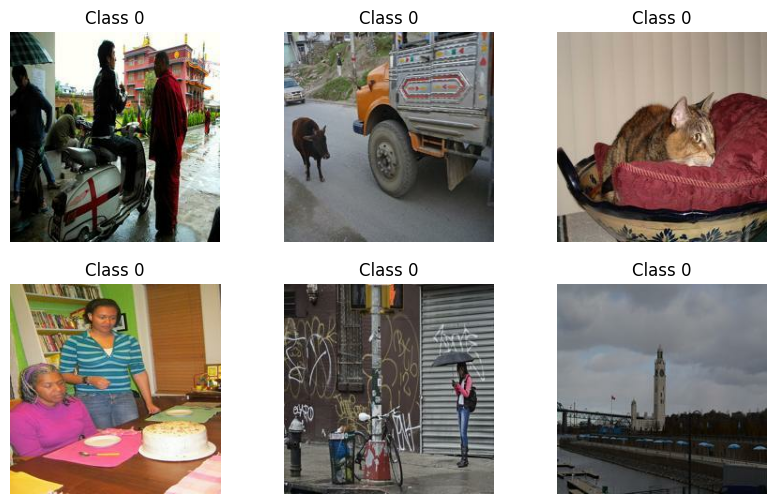

In [15]:

data_dir = r'../Livrable1/Dataset/autoencodeurdata'

# Load dataset (make sure images are RGB)
train_ds, val_ds = prepare_data(data_dir, target_size=(224, 224), batch_size=32)

# Preview a few images
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 6))
    for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class {labels[i].numpy()}")
        plt.axis("off")


## 🔧 Prepare Noisy Datasets

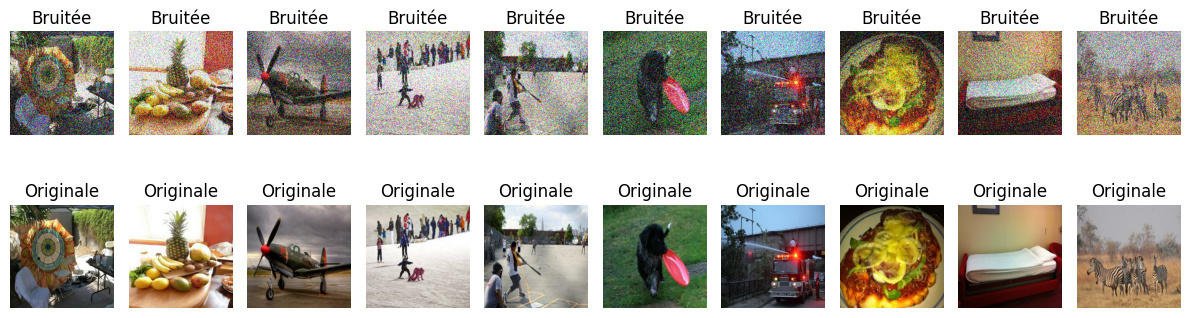

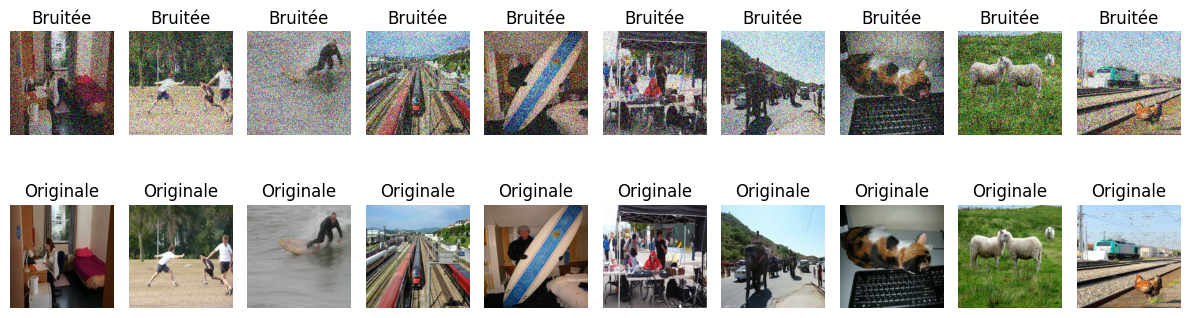

In [16]:

train_auto_ds = prepare_autoencoder_dataset(train_ds, noise=True)
display_dataset_samples(train_auto_ds , 10)
val_auto_ds = prepare_autoencoder_dataset(val_ds, noise=True)
display_dataset_samples(val_auto_ds , 10)

## 🛠️ Build Autoencoder

In [17]:

input_shape = (224, 224, 3)
autoencoder = create_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mse')
plot_model(autoencoder, show_shapes=True, show_layer_names=True)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 56, 56, 32)        18464     
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 up_sampling2d_6 (UpSampling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 56, 56, 32)        4640      
                                                           

## 🚀 Train the Autoencoder

In [ ]:
autoencoder = create_autoencoder((224, 224, 3))

autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),  # tu peux tester 1e-4 aussi
                    loss='mse')



callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint("autoencoder_weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
]

# Entraînement
autoencoder.fit(train_auto_ds  ,
                validation_data=val_auto_ds,
                epochs=100,
                callbacks=callbacks,
                shuffle=True)



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 64)      1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 56, 56, 32)        18464     
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 up_sampling2d_9 (UpSampling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 56, 56, 32)        4640      
                                                           

## 📊 Evaluate Performance

Autoencoder Evaluation on 100 samples:
 - Mean MSE  : 0.0050
 - Mean MAE  : 0.0480
 - Mean SSIM : 0.6749 (1 = perfect match)


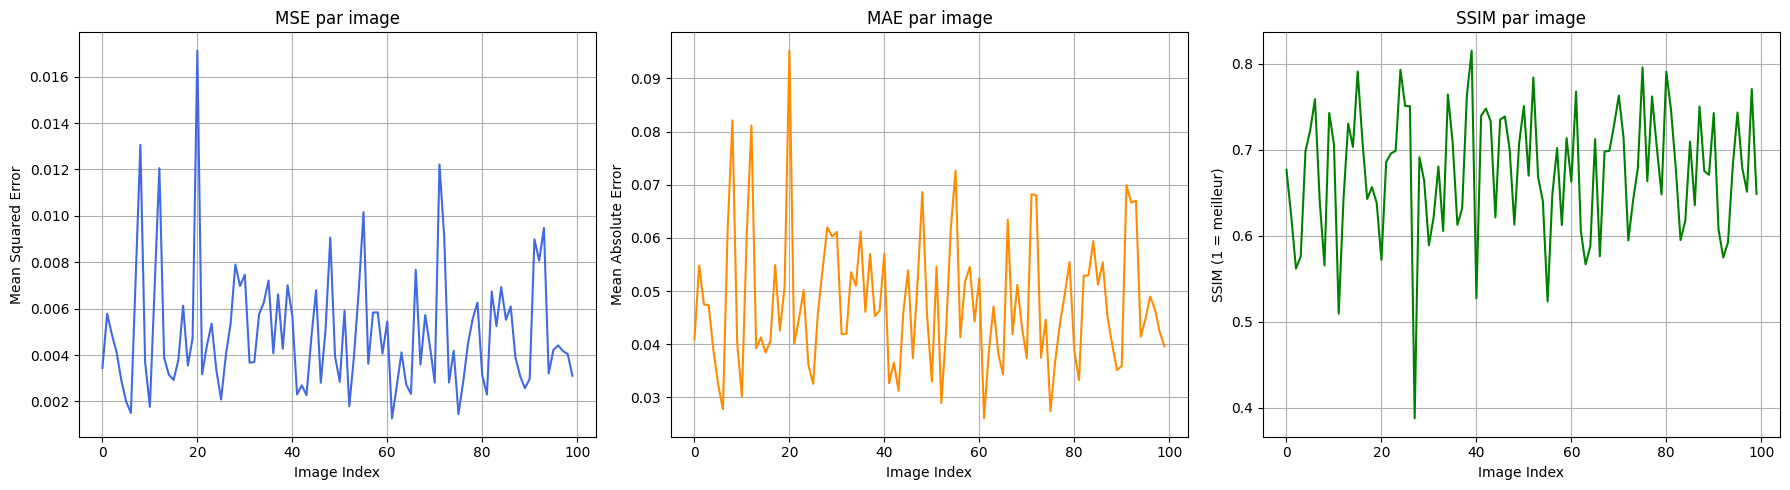

In [ ]:
result  = evaluate_autoencoder(autoencoder, val_auto_ds)
plot_autoencoder_metrics(result)

MSE (Mean Squared Error) : 0.0050
→ Une erreur quadratique très faible, ce qui montre que les pixels reconstruits sont très proches des pixels d’origine. Cela témoigne d’une reconstruction précise.

MAE (Mean Absolute Error) : 0.0480
→ L’erreur absolue moyenne est également faible, confirmant que l’écart global entre les images originales et reconstruites est minime.

SSIM (Structural Similarity Index) : 0.6749
→ Ce score indique une bonne préservation de la structure des images (forme, texture, luminance), bien que non parfaite. Rappel : SSIM = 1 signifie une image identique à l’originale. Un score de 0.67 est très respectable, surtout pour un autoencodeur simple.

## 🧪 Case Study

1/1 [==============================] - 0s 29ms/step


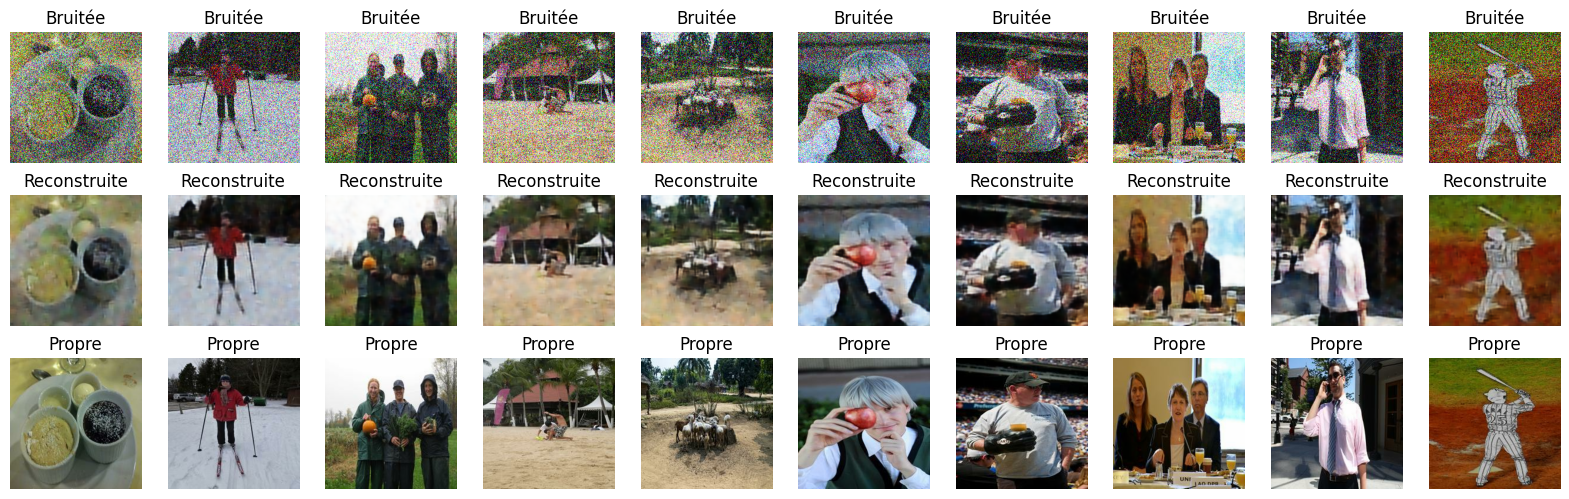

In [ ]:
display_comparison(autoencoder, val_ds, n=10, noisy=True)

## 🧾 Conclusion du Projet – Autoencodeur

Dans ce projet, nous avons conçu, entraîné et évalué un **autoencodeur convolutionnel** dans le but de reconstruire des images à partir d’un jeu de données. Voici les principales étapes et résultats :

### 🔧 1. Construction & Entraînement
- Un **autoencodeur CNN** a été implémenté avec un encodeur compact et un décodeur symétrique.
- Le modèle a été entraîné avec une fonction de perte **MSE**, optimisé via **Adam**, et validé sur un sous-ensemble de données.
- Le processus d'entraînement a montré une **convergence rapide**, avec une réduction régulière de la perte, signe d’un bon apprentissage.

### 🖼️ 2. Visualisation des reconstructions
- Des exemples visuels ont permis de **comparer les images originales et reconstruites**.
- Les résultats ont montré que le modèle **réussit à préserver la structure globale des images**, avec quelques pertes de détails fins.

### 📊 3. Évaluation quantitative
Sur 100 échantillons de validation, les performances du modèle sont les suivantes :

- **MSE moyen** : `0.0050`  
- **MAE moyen** : `0.0480`  
- **SSIM moyen** : `0.6749`

#### 🔍 Interprétation :
- Ces scores indiquent une **reconstruction fidèle** : les erreurs numériques sont faibles et la similarité structurelle est bien maintenue.
- Le modèle est capable de **générer des images proches visuellement** de l’original, bien que certaines pertes subtiles puissent exister.

---

### ✅ Conclusion générale
L’autoencodeur mis en place a démontré une **capacité efficace à apprendre une représentation compressée** des images tout en étant capable de **les reconstruire avec une bonne fidélité**. Les résultats obtenus sont satisfaisants pour un modèle de base, et ouvrent la porte à des améliorations futures, comme :

- L'ajout de **couches plus profondes**,
- L’introduction de **bruit (denoising autoencoder)**,
- Ou encore l'utilisation d'**autoencodeurs variationnels (VAE)** pour des applications plus génératives.
